In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.datasets import fetch_california_housing


In [2]:
LOCAL_DIR = os.path.join("data", "housing")
LOCAL_FILE = os.path.join(LOCAL_DIR,'housing.csv')

In [3]:
df = pd.read_csv(LOCAL_FILE)

In [4]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
df = df[df["ocean_proximity"] != 'ISLAND']

In [8]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

In [9]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20635.000000  20635.000000        20635.000000  20635.000000   
mean    -119.569999     35.632412           28.636152   2636.020208   
std        2.003685      2.135918           12.583924   2181.794772   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1448.000000   
50%     -118.500000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20428.000000  20635.000000  20635.000000   20635.000000   
mean       537.899305   1425.660286    499.593700       3.870944   
std        421.425970   1132.530137    382.357072       1.899961   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563100   
50%        435.000000   1166.000000    409.000000       3.535200   
75%        647.000000   1725.000000    605.000000       4.743700   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20635.000000  
mean        206813.756288  
std         115372.499511  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184CF91D2E8>,
      dtype=object)

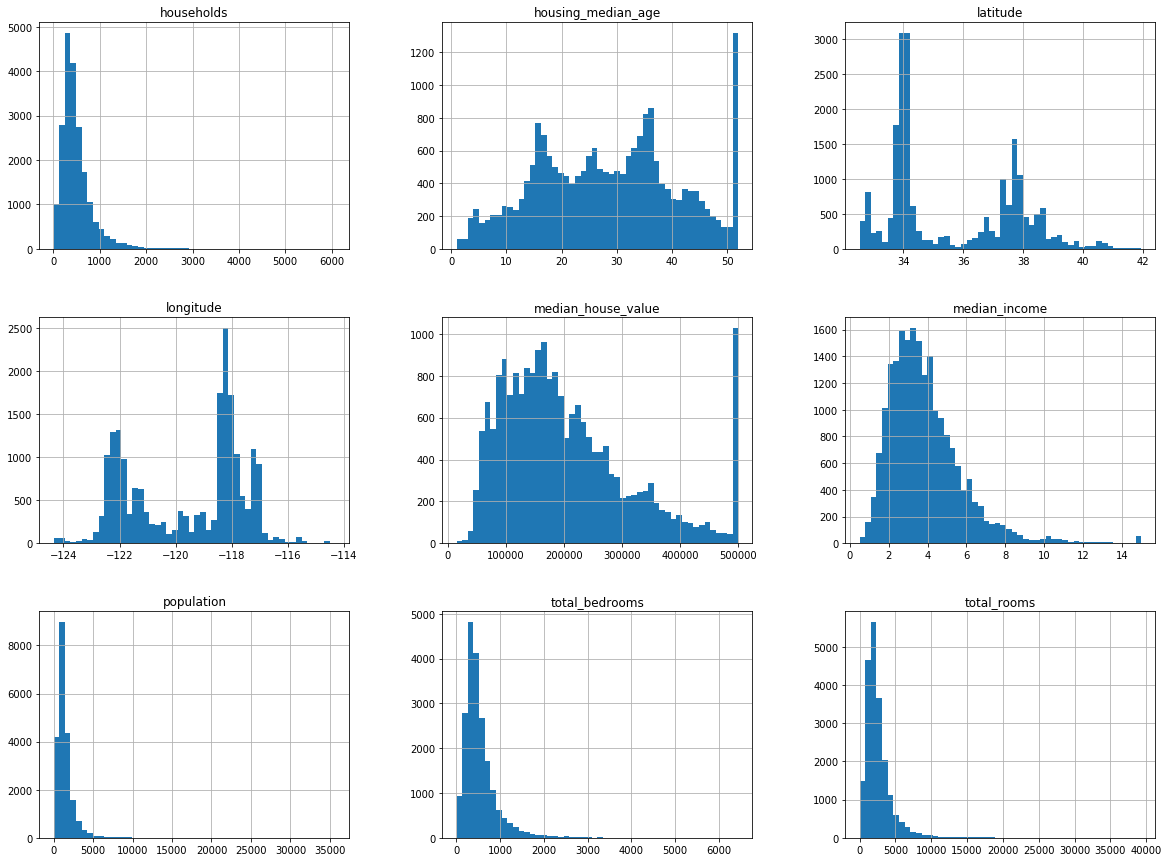

In [10]:
df.hist(bins=50, figsize=(20,15))

## Three ways to Deal with Missing Values
### 1. Drop the rows containing missing values
### 2. Drop the whole column that has missing values
### 3. For Numerical columns, Impute (estimate) the values with mean, median or some other statistic of the column

In [ ]:

#df.dropna(subset=["total_bedrooms"]) # option 1

#df.drop("total_bedrooms", axis=1) # option 2

#median = df["total_bedrooms"].median()
#df["total_bedrooms"].fillna(median) # option 3

In [13]:
housing = fetch_california_housing(data_home=None, download_if_missing=True)

In [14]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [15]:
df2 = pd.DataFrame(housing.data,columns=housing.feature_names)

In [16]:
df2.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB
